In [4]:
import pandas as pd, numpy as np,seaborn as sb
data = pd.read_csv(r'/Users/shubham_kumar/Desktop/ml/decision.csv')
data

,outlook,temp,humid,wind,result
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,medium,high,weak,yes
4,rain,cold,normal,weak,yes
5,rain,cold,normal,strong,no
6,overcast,cold,normal,strong,yes
7,sunny,medium,high,weak,no
8,sunny,cold,normal,weak,yes
9,rain,medium,normal,weak,yes


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [29]:
outlook = LabelEncoder()
temp = LabelEncoder()
humid = LabelEncoder()
wind = LabelEncoder()
result = LabelEncoder()

In [30]:
data['outlook'] = outlook.fit_transform(data['outlook'])
data['temp'] = temp.fit_transform(data['temp'])
data['humid'] = humid.fit_transform(data['humid'])
data['wind'] = wind.fit_transform(data['wind'])
data['result'] = result.fit_transform(data['result'])

In [31]:
data

,outlook,temp,humid,wind,result
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [32]:
x = data[['outlook','temp','humid','wind']]
y = data[['result']]

In [33]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size =.3)

In [34]:
xte

,outlook,temp,humid,wind
9,1,2,1,1
4,1,0,1,1
8,2,0,1,1
0,2,1,0,1
1,2,1,0,0


In [46]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [47]:
classifier.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy')

In [48]:
classifier.predict(xte)

array([1, 0, 0, 0, 0])

In [53]:
xte,yte

(   outlook  temp  humid  wind
 9        1     2      1     1
 4        1     0      1     1
 8        2     0      1     1
 0        2     1      0     1
 1        2     1      0     0,
    result
 9       1
 4       1
 8       1
 0       0
 1       0)

In [50]:
classifier.score(xte,yte)

0.6

[Text(0.3333333333333333, 0.9166666666666666, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.16666666666666666, 0.75, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.75, 'X[1] <= 1.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.4166666666666667, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.25, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

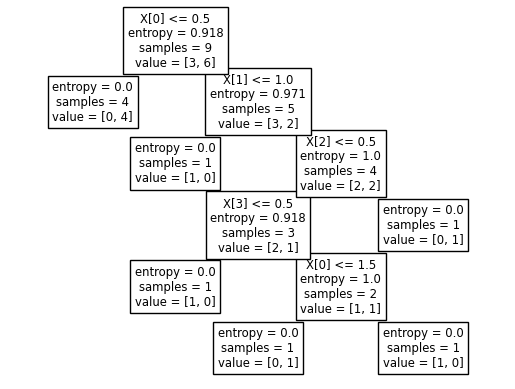

In [51]:
from sklearn import tree
tree.plot_tree(classifier)